In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import f_oneway




In [3]:
df= pd.read_csv('./data/Impact_of_Remote_Work_on_Mental_Health.csv')


In [4]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [6]:
df.Mental_Health_Condition.value_counts()

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Name: count, dtype: int64

In [7]:
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Asymptomatic')

In [8]:
df.Physical_Activity.value_counts()

Physical_Activity
Weekly    1755
Daily     1616
Name: count, dtype: int64

In [9]:
df['Physical_Activity'] = df['Physical_Activity'].fillna('Sedentary')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [11]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [12]:
df.columns = ['ID_Empleado','Edad','Género','Rol_Laboral','Industria','Años_Experiencia','Ubicación_Laboral','Horas_Semana','Nº_Reuniones',
              'Calif._Equilibrio_Vida_Laboral','Nivel_de_Estrés','Cond_Salud_Mental','Acceso_Recursos_Salud_Mental','Cambio_en_la_Product.',
              'Calif._Aislamiento_Social','Satisfacción_Trabajo_Remoto','Apoyo_Empresa_para_Trab._Remoto','Actividad_Física','Calidad_del_Sueño',
              'Región']
print(df.columns)

Index(['ID_Empleado', 'Edad', 'Género', 'Rol_Laboral', 'Industria',
       'Años_Experiencia', 'Ubicación_Laboral', 'Horas_Semana', 'Nº_Reuniones',
       'Calif._Equilibrio_Vida_Laboral', 'Nivel_de_Estrés',
       'Cond_Salud_Mental', 'Acceso_Recursos_Salud_Mental',
       'Cambio_en_la_Product.', 'Calif._Aislamiento_Social',
       'Satisfacción_Trabajo_Remoto', 'Apoyo_Empresa_para_Trab._Remoto',
       'Actividad_Física', 'Calidad_del_Sueño', 'Región'],
      dtype='object')


In [13]:
df.drop(['ID_Empleado', 'Ubicación_Laboral'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Edad                             5000 non-null   int64 
 1   Género                           5000 non-null   object
 2   Rol_Laboral                      5000 non-null   object
 3   Industria                        5000 non-null   object
 4   Años_Experiencia                 5000 non-null   int64 
 5   Horas_Semana                     5000 non-null   int64 
 6   Nº_Reuniones                     5000 non-null   int64 
 7   Calif._Equilibrio_Vida_Laboral   5000 non-null   int64 
 8   Nivel_de_Estrés                  5000 non-null   object
 9   Cond_Salud_Mental                5000 non-null   object
 10  Acceso_Recursos_Salud_Mental     5000 non-null   object
 11  Cambio_en_la_Product.            5000 non-null   object
 12  Calif._Aislamiento_Social        5

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,Edad,Años_Experiencia,Horas_Semana,Nº_Reuniones,Calif._Equilibrio_Vida_Laboral,Calif._Aislamiento_Social,Apoyo_Empresa_para_Trab._Remoto
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [16]:
# Convertir
df['Edad'].astype(int)
df['Años_Experiencia'].astype(int)
df['Horas_Semana'].astype(int)
df['Nº_Reuniones'].astype(int)
df[['Calif._Equilibrio_Vida_Laboral', 'Calif._Aislamiento_Social', 'Apoyo_Empresa_para_Trab._Remoto']].round(2)
df

,Edad,Género,Rol_Laboral,Industria,Años_Experiencia,Horas_Semana,Nº_Reuniones,Calif._Equilibrio_Vida_Laboral,Nivel_de_Estrés,Cond_Salud_Mental,Acceso_Recursos_Salud_Mental,Cambio_en_la_Product.,Calif._Aislamiento_Social,Satisfacción_Trabajo_Remoto,Apoyo_Empresa_para_Trab._Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,32,Non-binary,HR,Healthcare,13,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Sedentary,Poor,North America
3,27,Male,Software Engineer,Finance,20,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Sedentary,Poor,Europe
4,49,Male,Sales,Consulting,32,35,12,2,High,Asymptomatic,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,Sales,Consulting,4,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Female,Sales,Healthcare,27,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,Sedentary,Average,Africa
4997,42,Female,Sales,Healthcare,21,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Female,Sales,Healthcare,26,58,0,5,Low,Asymptomatic,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


<Axes: >

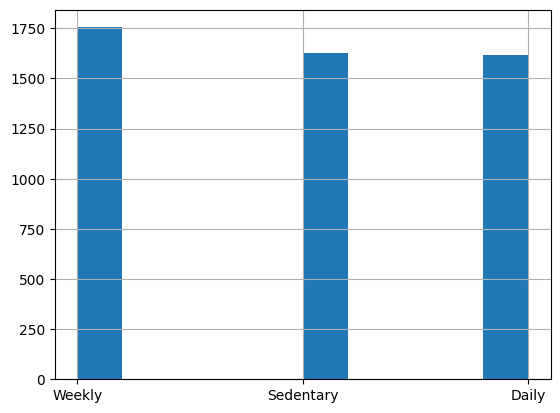

In [28]:
df.Actividad_Física.hist()

In [18]:
#Frecuencias, Moda, Absolutas, Relativas:
for column in df.select_dtypes(include='object'):
    print(df[column].value_counts())
    print(df[column].mode())
    print(df[column].value_counts(normalize=True))


Género
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64
0    Female
Name: Género, dtype: object
Género
Female               0.2548
Male                 0.2540
Prefer not to say    0.2484
Non-binary           0.2428
Name: proportion, dtype: float64
Rol_Laboral
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64
0    Project Manager
Name: Rol_Laboral, dtype: object
Rol_Laboral
Project Manager      0.1476
Sales                0.1466
Designer             0.1446
HR                   0.1432
Software Engineer    0.1422
Data Scientist       0.1392
Marketing            0.1366
Name: proportion, dtype: float64
Industria
Finance          747
IT               746
Healthcare       728
Retail           726
Education        690
Manufacturing    683
Consulting       680
Name: 

In [19]:
# Tendencia central
print(df.describe())


              Edad  Años_Experiencia  Horas_Semana  Nº_Reuniones  \
count  5000.000000       5000.000000   5000.000000   5000.000000   
mean     40.995000         17.810200     39.614600      7.559000   
std      11.296021         10.020412     11.860194      4.636121   
min      22.000000          1.000000     20.000000      0.000000   
25%      31.000000          9.000000     29.000000      4.000000   
50%      41.000000         18.000000     40.000000      8.000000   
75%      51.000000         26.000000     50.000000     12.000000   
max      60.000000         35.000000     60.000000     15.000000   

       Calif._Equilibrio_Vida_Laboral  Calif._Aislamiento_Social  \
count                     5000.000000                5000.000000   
mean                         2.984200                   2.993800   
std                          1.410513                   1.394615   
min                          1.000000                   1.000000   
25%                          2.000000          

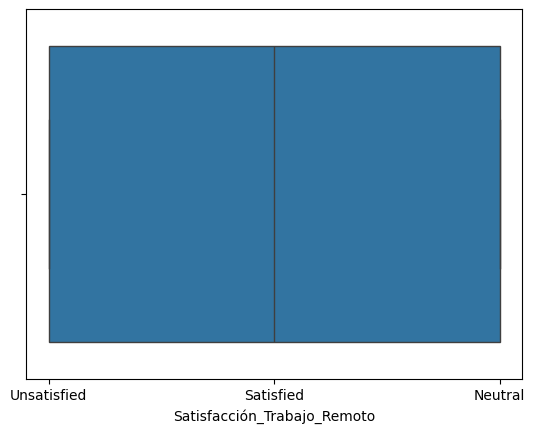

In [20]:
# Boxplot
sns.boxplot(x=df['Satisfacción_Trabajo_Remoto'])
plt.show()


In [21]:

# IQR
Q1 = df['Calif._Equilibrio_Vida_Laboral'].quantile(0.25)
Q3 = df['Calif._Equilibrio_Vida_Laboral'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')


IQR: 2.0


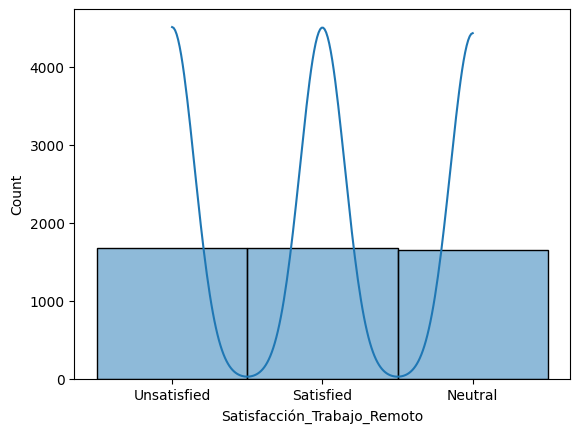

In [22]:
#Distribución
sns.histplot(df['Satisfacción_Trabajo_Remoto'], kde=True)
plt.show()


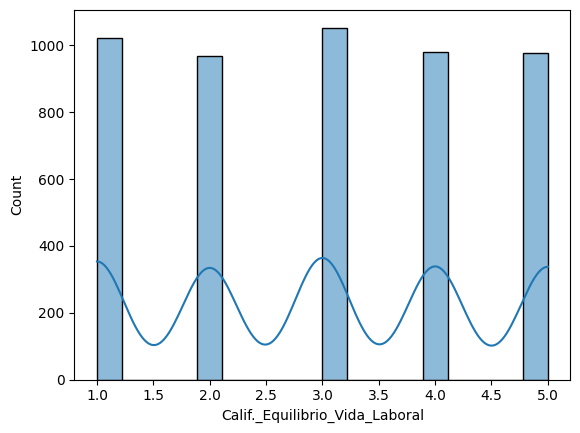

In [23]:
#Distribución
sns.histplot(df['Calif._Equilibrio_Vida_Laboral'], kde=True)
plt.show()


In [24]:
#Cat. p-value, chi2:

categorical_vars = ['Cond_Salud_Mental', 'Actividad_Física']

for var in categorical_vars:
    contingency_table = pd.crosstab(df['Cond_Salud_Mental'], df[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-cuadrado para {var}:')
    print(f'Chi2: {chi2}, p-value: {p}')


Chi-cuadrado para Cond_Salud_Mental:
Chi2: 15000.0, p-value: 0.0
Chi-cuadrado para Actividad_Física:
Chi2: 7.817432281153041, p-value: 0.251786189217363


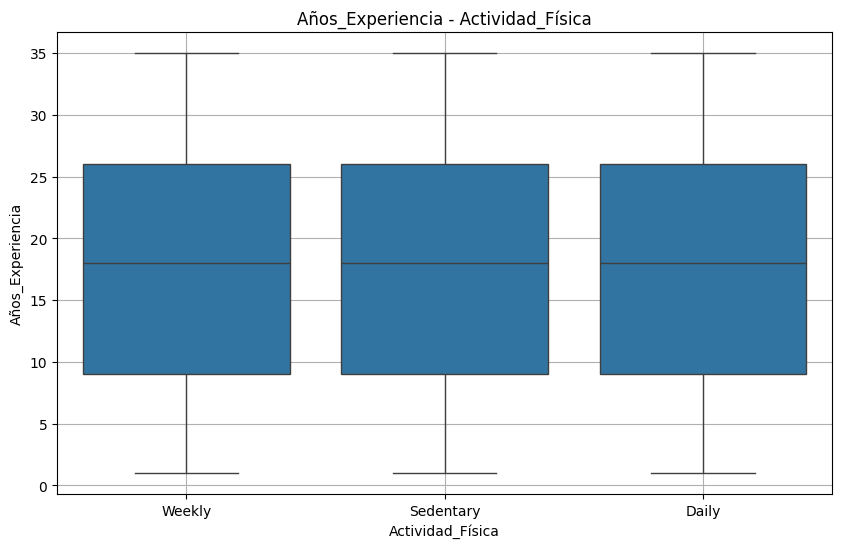

In [39]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Actividad_Física', y='Años_Experiencia', data=df)

# Añadir título y etiquetas
plt.title('Años_Experiencia - Actividad_Física')
plt.xlabel('Actividad_Física')
plt.ylabel('Años_Experiencia')
plt.grid(True)

# Mostrar la gráfica
plt.show()


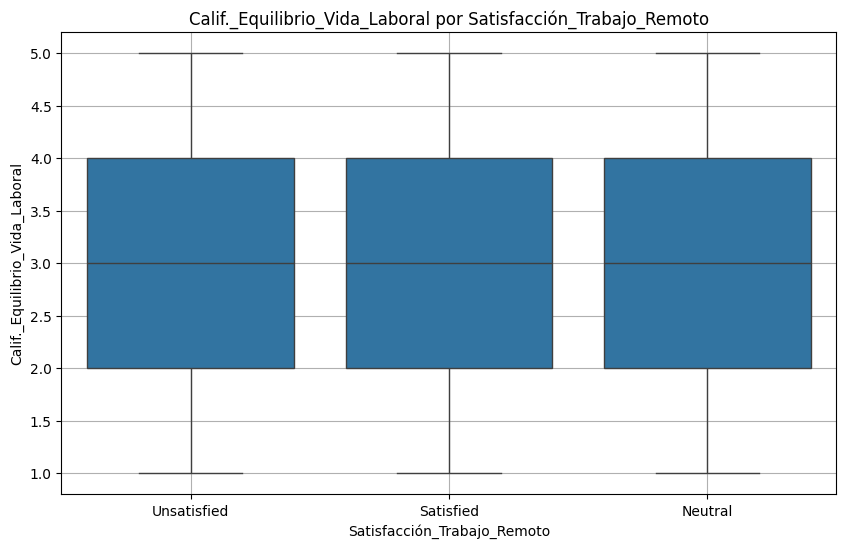

In [27]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfacción_Trabajo_Remoto', y='Calif._Equilibrio_Vida_Laboral', data=df)


plt.title('Calif._Equilibrio_Vida_Laboral por Satisfacción_Trabajo_Remoto')
plt.xlabel('Satisfacción_Trabajo_Remoto')
plt.ylabel('Calif._Equilibrio_Vida_Laboral')
plt.grid(True)

plt.show()


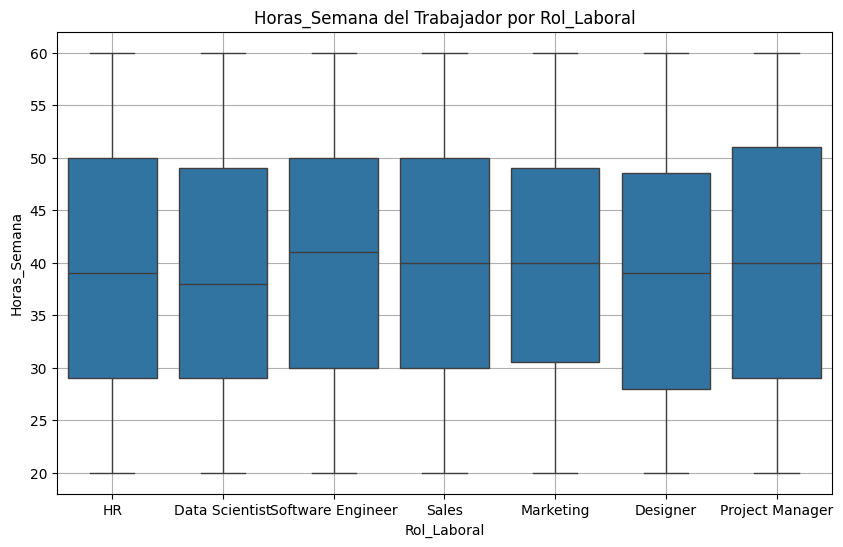

In [117]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Rol_Laboral', y='Horas_Semana', data=df)

plt.title('Horas_Semana del Trabajador por Rol_Laboral')
plt.xlabel('Rol_Laboral')
plt.ylabel('Horas_Semana')
plt.grid(True)

plt.show()


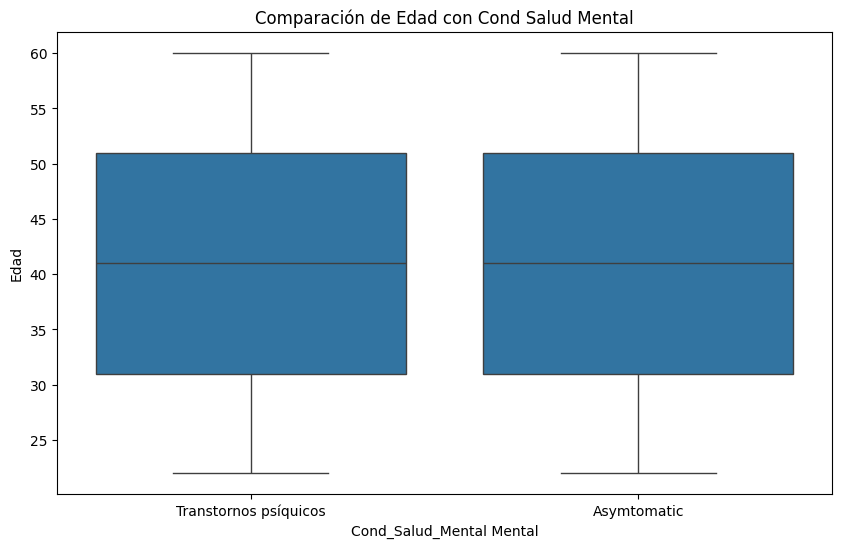

In [40]:

df['Cond_Salud_Mental_grupo'] = df['Cond_Salud_Mental'].apply(lambda x: 'Transtornos psíquicos' if x in ['Depression', 'Anxiety', 'Burnout'] else 'Asymtomatic')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cond_Salud_Mental_grupo', y='Edad', data=df)
plt.title('Comparación de Edad con Cond Salud Mental')
plt.xlabel('Cond_Salud_Mental Mental')
plt.ylabel('Edad')

plt.show()


In [ ]:
estadisticas = df.groupby('Cond_Salud_Mental_grupo')['Edad'].describe()
print(estadisticas)

In [118]:

numeric_vars = ['Edad', 'Años_Experiencia', 'Horas_Semana', 'Nº_Reuniones']

for var in numeric_vars:
    group1 = df[df['Satisfacción_Trabajo_Remoto'] == 'Satisfied'][var]
    group2 = df[df['Satisfacción_Trabajo_Remoto'] == 'Unsatisfied'][var]
    t_stat, t_p = ttest_ind(group1, group2, equal_var=False)
    
    mw_stat, mw_p = mannwhitneyu(group1, group2)
    
    print(f'T-Test para {var}: t-stat: {t_stat}, p-value: {t_p}')
    print(f'Mann-Whitney U test para {var}: U-stat: {mw_stat}, p-value: {mw_p}')



T-Test para Edad: t-stat: 0.02272476454773784, p-value: 0.981871175161847
Mann-Whitney U test para Edad: U-stat: 1404599.5, p-value: 0.9968234155662558
T-Test para Años_Experiencia: t-stat: 1.8272412317918014, p-value: 0.06775243932590506
Mann-Whitney U test para Años_Experiencia: U-stat: 1455640.5, p-value: 0.06775579345140752
T-Test para Horas_Semana: t-stat: -0.21642808956576906, p-value: 0.8286672516188661
Mann-Whitney U test para Horas_Semana: U-stat: 1398016.5, p-value: 0.8172901381329248
T-Test para Nº_Reuniones: t-stat: -1.49885742605532, p-value: 0.1340048676082028
Mann-Whitney U test para Nº_Reuniones: U-stat: 1362506.5, p-value: 0.13324401549937986


In [119]:

grupos_validos = df['Cond_Salud_Mental'].value_counts().index.tolist()

# ANOVA
datos_grupos = [df[df['Cond_Salud_Mental'] == grupo]['Edad'] for grupo in grupos_validos]

# ANOVA dos grupos
if len(datos_grupos) > 1:
    anova_results = f_oneway(*datos_grupos)
    print(f'ANOVA: F-stat: {anova_results.statistic}, p-value: {anova_results.pvalue}')
else:
    print('No hay suficientes grupos para realizar ANOVA.')


ANOVA: F-stat: 0.14415166137895274, p-value: 0.9334541995518612


In [120]:
#Tabla de contingencia:
contingency_table = pd.crosstab(df['Género'], df['Rol_Laboral'])
print(contingency_table)

contingency_table = pd.crosstab(df['Cond_Salud_Mental'], df['Actividad_Física'])
print(contingency_table)

Rol_Laboral        Data Scientist  Designer   HR  Marketing  Project Manager  \
Género                                                                         
Female                        204       182  179        171              170   
Male                          161       171  179        192              200   
Non-binary                    156       192  156        162              179   
Prefer not to say             175       178  202        158              189   

Rol_Laboral        Sales  Software Engineer  
Género                                       
Female               193                175  
Male                 182                185  
Non-binary           185                184  
Prefer not to say    173                167  
Actividad_Física   Daily  Sedentary  Weekly
Cond_Salud_Mental                          
Anxiety              417        381     480
Asymptomatic         394        402     400
Burnout              406        426     448
Depression           39

In [121]:
#Pearson
correlation_matrix = df[numeric_vars].corr(method='pearson')
print(correlation_matrix)


                      Edad  Años_Experiencia  Horas_Semana  Nº_Reuniones
Edad              1.000000         -0.004480     -0.001352      0.003617
Años_Experiencia -0.004480          1.000000     -0.018537      0.019043
Horas_Semana     -0.001352         -0.018537      1.000000     -0.004609
Nº_Reuniones      0.003617          0.019043     -0.004609      1.000000


In [122]:

X = df[['Edad', 'Años_Experiencia', 'Horas_Semana']]
y = df['Calif._Equilibrio_Vida_Laboral']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Calif._Equilibrio_Vida_Laboral   R-squared:                       0.000
Model:                                        OLS   Adj. R-squared:                 -0.000
Method:                             Least Squares   F-statistic:                    0.5283
Date:                            Tue, 10 Dec 2024   Prob (F-statistic):              0.663
Time:                                    18:50:39   Log-Likelihood:                -8813.2
No. Observations:                            5000   AIC:                         1.763e+04
Df Residuals:                                4996   BIC:                         1.766e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

In [128]:
df.columns

Index(['Edad', 'Género', 'Rol_Laboral', 'Industria', 'Años_Experiencia',
       'Horas_Semana', 'Nº_Reuniones', 'Calif._Equilibrio_Vida_Laboral',
       'Nivel_de_Estrés', 'Cond_Salud_Mental', 'Acceso_Recursos_Salud_Mental',
       'Cambio_en_la_Product.', 'Calif._Aislamiento_Social',
       'Satisfacción_Trabajo_Remoto', 'Apoyo_Empresa_para_Trab._Remoto',
       'Actividad_Física', 'Calidad_del_Sueño', 'Región',
       'Cond_Salud_Mental_grupo'],
      dtype='object')

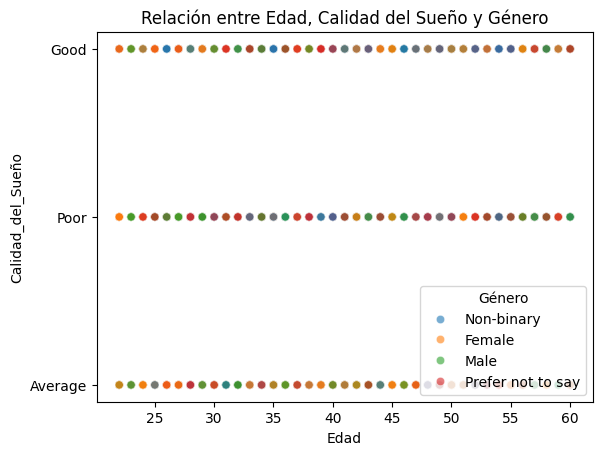

In [133]:
sns.scatterplot(data=df, x='Edad', y='Calidad_del_Sueño', hue='Género', alpha=0.6)
plt.title('Relación entre Edad, Calidad del Sueño y Género')
plt.show()


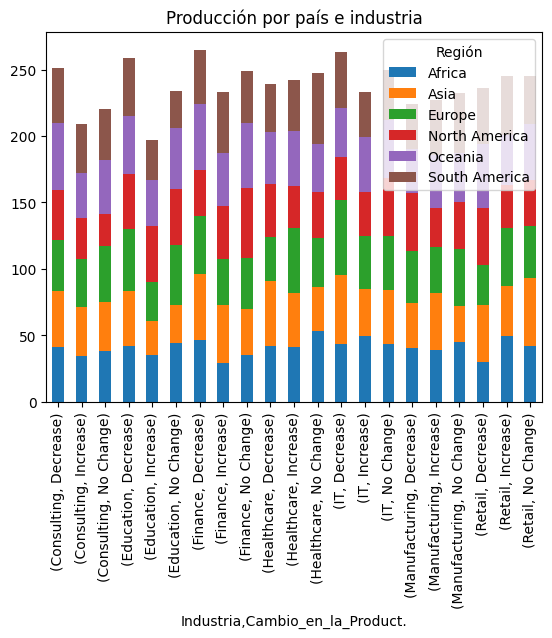

In [137]:
cambios_pais_industria = df.groupby(['Industria', 'Cambio_en_la_Product.', 'Región']).size().unstack(fill_value=0)

age_class_survival.plot(kind='bar', stacked=True)
plt.title('Producción por país e industria')
plt.show()


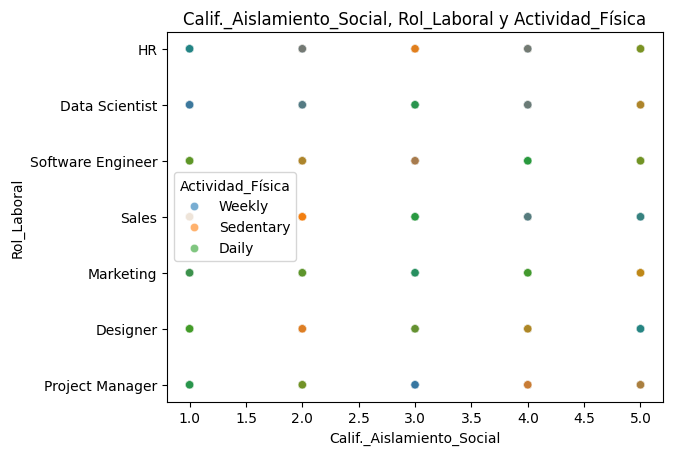

In [30]:
sns.scatterplot(data=df, x='Calif._Aislamiento_Social', y='Rol_Laboral', hue='Actividad_Física', alpha=0.6)
plt.title('Calif._Aislamiento_Social, Rol_Laboral y Actividad_Física')
plt.show()


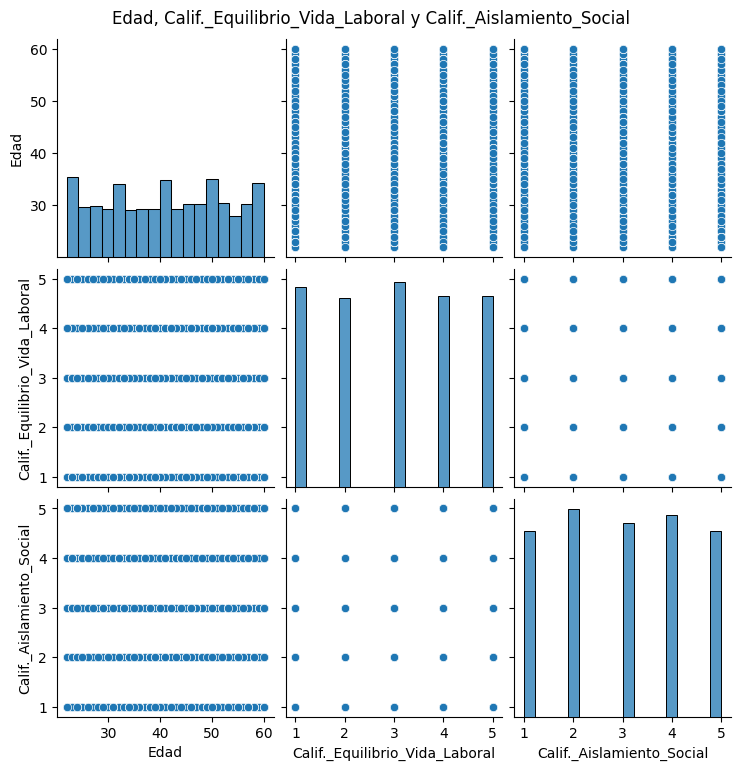

In [37]:
sns.pairplot(df[['Edad', 'Calif._Equilibrio_Vida_Laboral', 'Calif._Aislamiento_Social']])
plt.suptitle('Edad, Calif._Equilibrio_Vida_Laboral y Calif._Aislamiento_Social', y=1.02)
plt.show()
